In [3]:
!pip install kaggle

In [12]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 95% 155M/163M [00:02<00:00, 66.1MB/s]
100% 163M/163M [00:02<00:00, 73.0MB/s]


In [6]:
# extracting the masked and unmasked from the  compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Importing the dependencies:

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_722.jpg', 'with_mask_1970.jpg', 'with_mask_480.jpg', 'with_mask_645.jpg', 'with_mask_2205.jpg']
['without_mask_3656.jpg', 'without_mask_3742.jpg', 'without_mask_1750.jpg', 'without_mask_3188.jpg', 'without_mask_1583.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating labels for the two classes:

with mask --> 1
without mask -> 0

In [10]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the image:

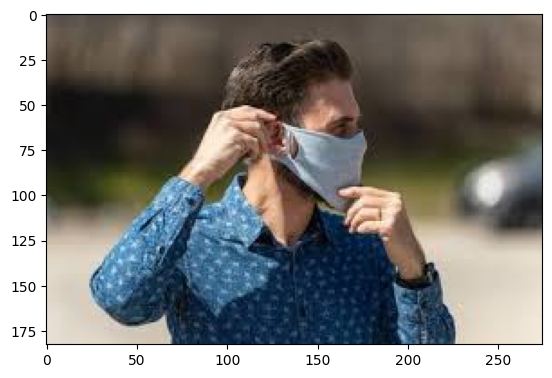

In [14]:
# with mask
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

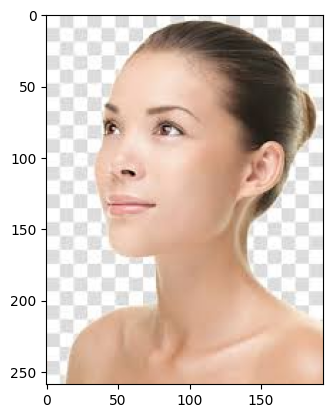

In [16]:
# without mask
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing:-
1. Resizing the images
2. Converting the images to numpy arrays

In [17]:

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128)) # resizing the images
  image = image.convert('RGB')
  image = np.array(image) # converting the images to numpy arrays
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
print(type(data),len(data))

<class 'list'> 7553


Converting image and label lists to numpy arrays:-

In [19]:
X = np.array(data)
Y = np.array(labels)

In [20]:
print(X.shape,Y.shape)

(7553, 128, 128, 3) (7553,)


Splitting the data into training and testing sets

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Scaling the data:-

In [23]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
print(X_train_scaled[0])

[[[0.95686275 0.89803922 0.89803922]
  [0.90588235 0.83137255 0.82745098]
  [0.87058824 0.78431373 0.78039216]
  ...
  [0.83921569 0.7254902  0.70980392]
  [0.8745098  0.76078431 0.74509804]
  [0.89803922 0.78431373 0.76862745]]

 [[0.98431373 0.9254902  0.9254902 ]
  [0.94509804 0.87058824 0.86666667]
  [0.91372549 0.82745098 0.82745098]
  ...
  [0.84705882 0.72941176 0.72156863]
  [0.89411765 0.77647059 0.76862745]
  [0.91764706 0.8        0.79215686]]

 [[1.         0.94901961 0.94901961]
  [0.98431373 0.90980392 0.90588235]
  [0.96078431 0.8745098  0.8745098 ]
  ...
  [0.84313725 0.7254902  0.71764706]
  [0.87843137 0.76078431 0.75294118]
  [0.90196078 0.78431373 0.77647059]]

 ...

 [[0.90980392 0.81568627 0.8       ]
  [0.92156863 0.82745098 0.81176471]
  [0.92941176 0.83137255 0.81568627]
  ...
  [0.79215686 0.67058824 0.64313725]
  [0.76470588 0.63529412 0.61568627]
  [0.76470588 0.63529412 0.61568627]]

 [[0.91372549 0.81960784 0.80392157]
  [0.9254902  0.83137255 0.81568627]


Building a Convolutional Neural Network:-

In [25]:
import tensorflow as tf
from tensorflow import keras

In [27]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # to reduce overfitting


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) # output layer

In [28]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [31]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=100)

Epoch 1/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9803 - loss: 0.0577 - val_acc: 0.8959 - val_loss: 0.4472
Epoch 2/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9809 - loss: 0.0606 - val_acc: 0.9207 - val_loss: 0.3919
Epoch 3/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9809 - loss: 0.0514 - val_acc: 0.9207 - val_loss: 0.3254
Epoch 4/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9879 - loss: 0.0414 - val_acc: 0.9256 - val_loss: 0.4228
Epoch 5/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9881 - loss: 0.0344 - val_acc: 0.9140 - val_loss: 0.3721
Epoch 6/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9845 - loss: 0.0374 - val_acc: 0.9207 - val_loss: 0.4214
Epoch 7/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.9920 - loss: 0.0249 - val_acc: 0.9256 - val_loss: 0.3753
Epoch 8/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - acc: 0.9904 - loss: 0.0329 - val_acc: 0.9223 - val_loss: 0.4505
Epoch 9/100
170/170 ━━━━━━━━━━━━━━━━━━━━

Model Evaluation:-

In [32]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9443 - loss: 0.6220
Test Accuracy = 0.9358041286468506


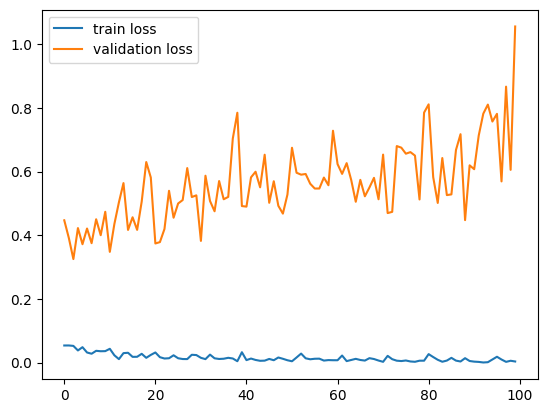

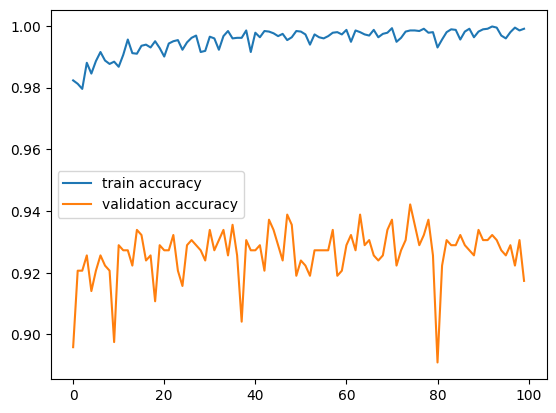

In [35]:
h = history

# plotting the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plotting the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive system:-

In [1]:
def test_image_for_mask(model):
    
    input_image_path = input('Enter the path of the image to be tested: ')
   
    input_image = cv2.imread(input_image_path)

    cv2_imshow(input_image)
    input_image_resized = cv2.resize(input_image, (128,128)) 
    input_image_scaled = input_image_resized / 255
 
    input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
 
    input_prediction = model.predict(input_image_reshaped)
    print(input_prediction)
  
    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)
  
    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')


In [42]:
test_image_for_mask(model)

Enter the path of the image to be tested: /content/test.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The person in the image is wearing a mask


Enter the path of the image to be tested: /content/unmasked.jpg


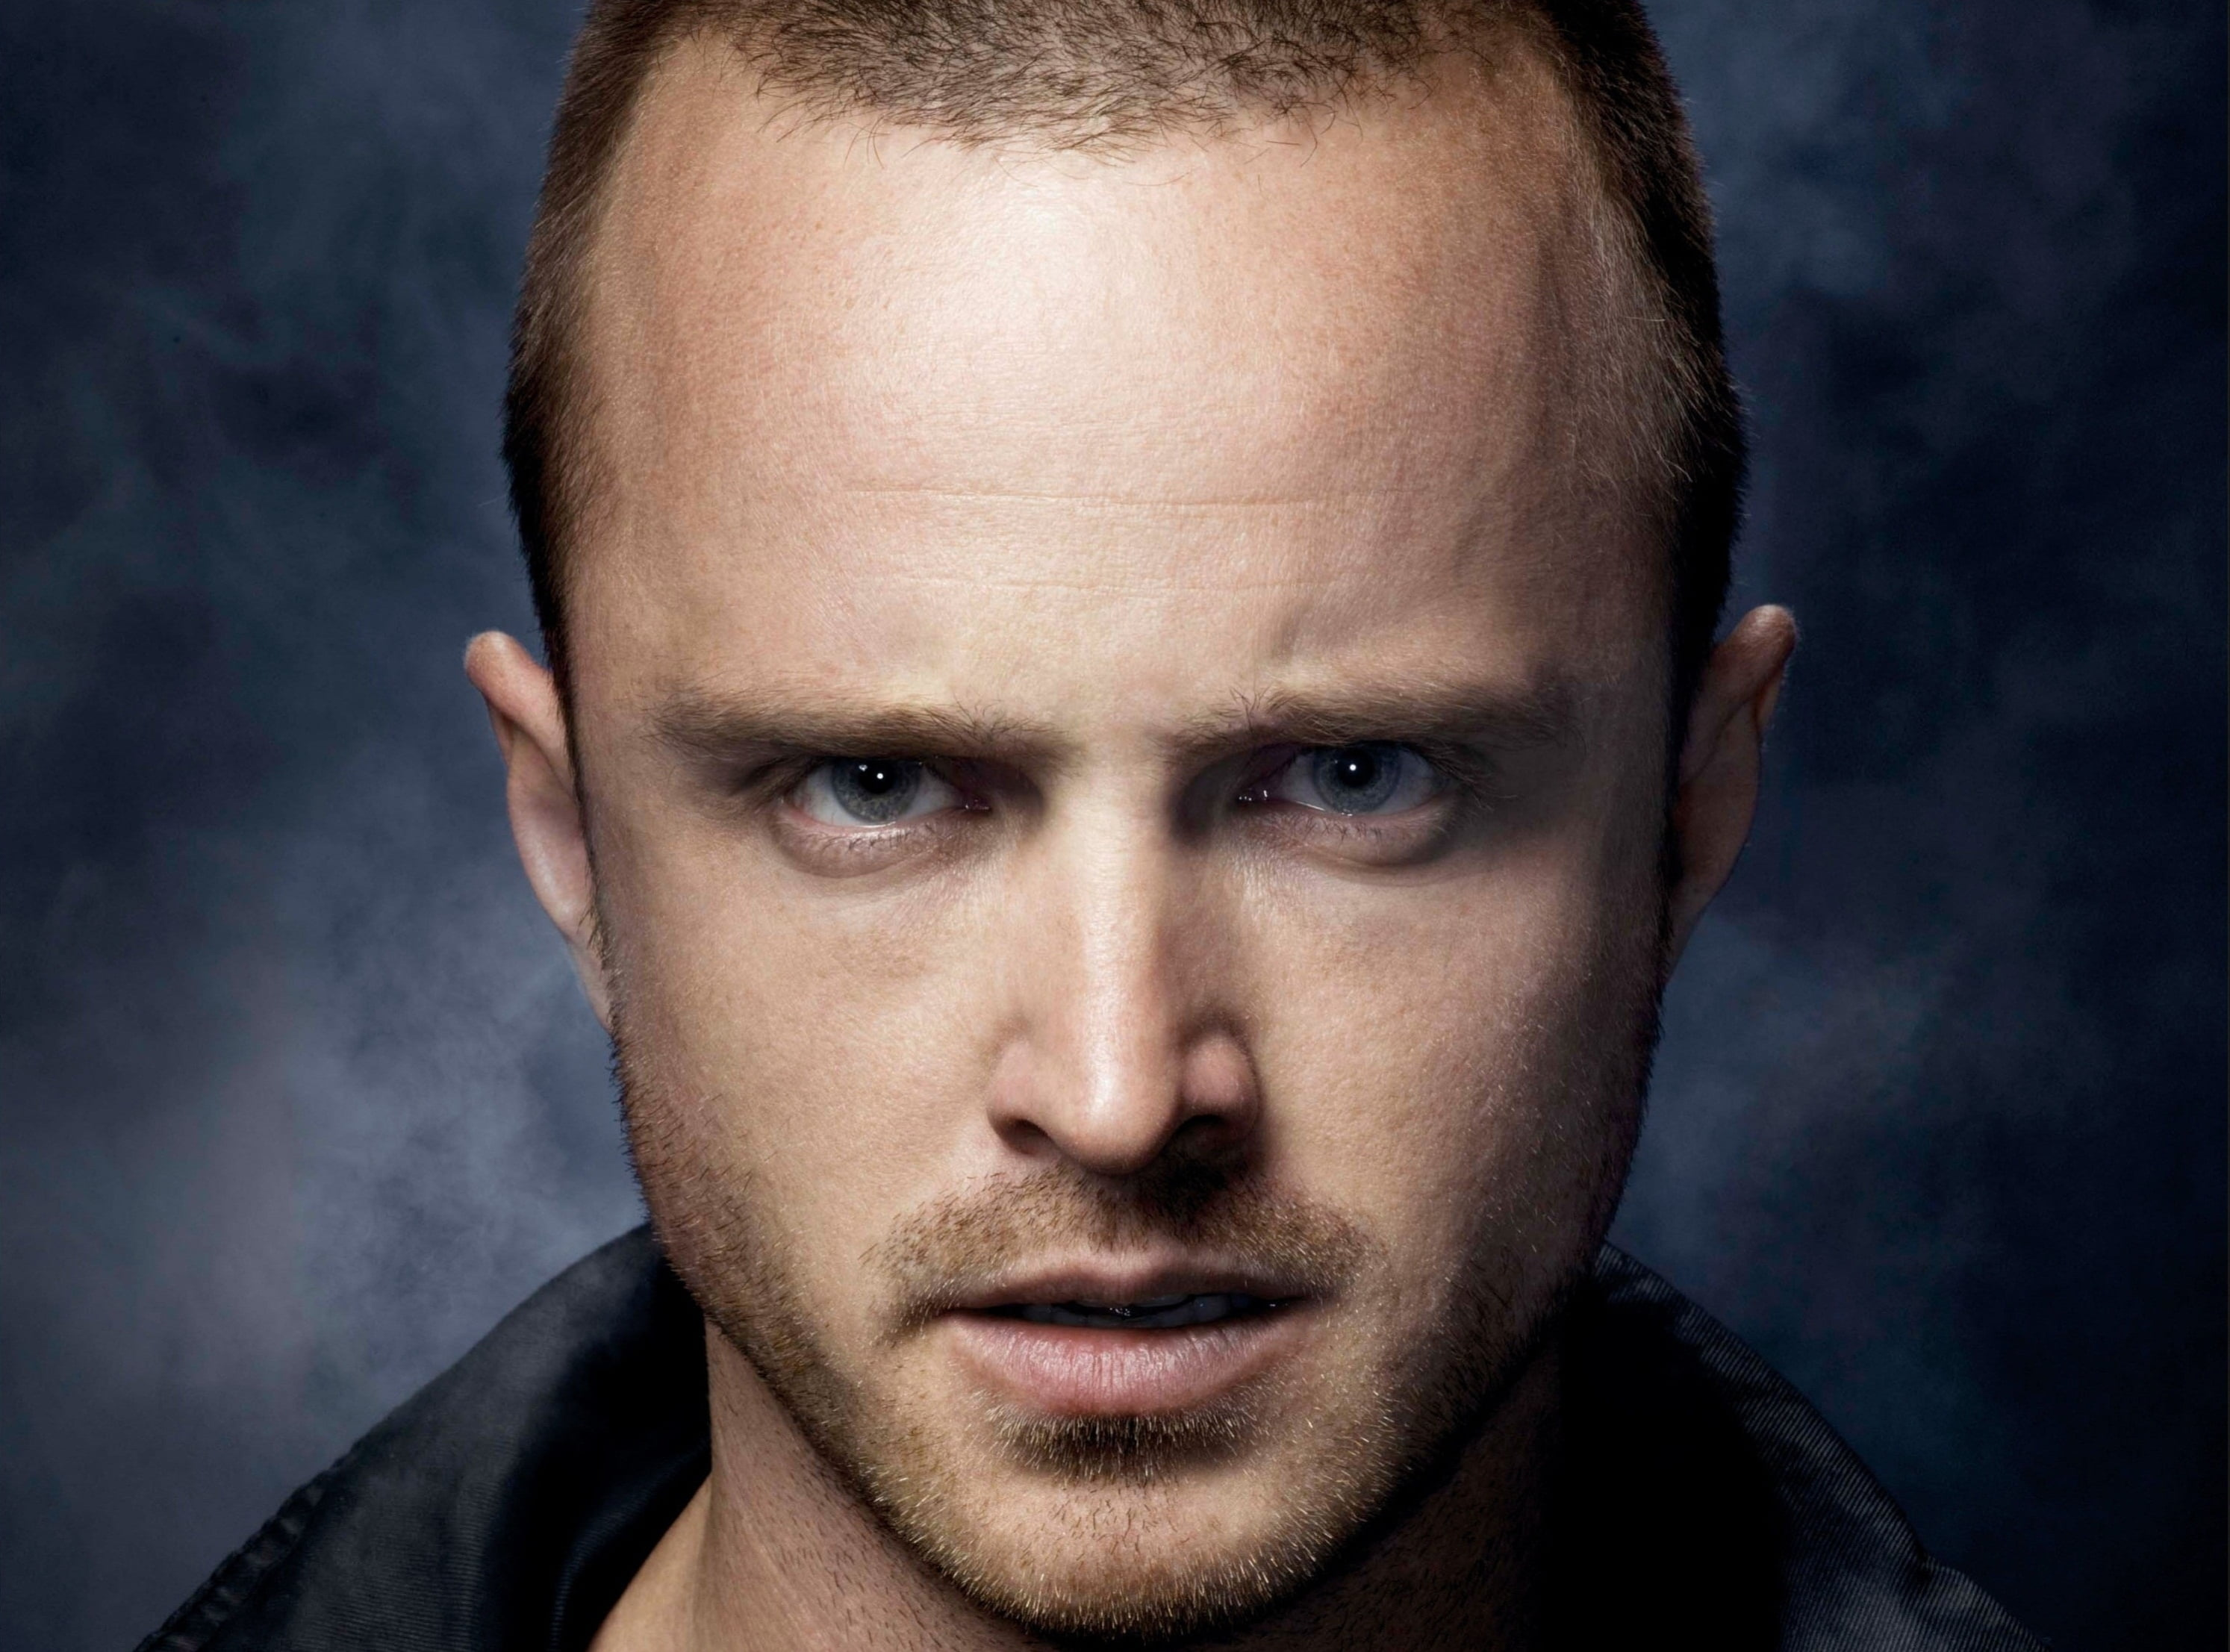

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.99957794 0.00403705]]
0
The person in the image is not wearing a mask


In [47]:
test_image_for_mask(model)